<a href="https://colab.research.google.com/github/tomradch/MSCIDS_Computational_Language_Technologies/blob/main/3_1_train_your_clothing_space.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup


In [ ]:
# import warnings
# warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib
import matplotlib.pyplot as plt

from pathlib import Path

# Default Style Settings
matplotlib.rcParams['figure.dpi'] = 300
pd.options.display.max_colwidth = 200
#%matplotlib inline

In [ ]:
!pip install gensim==3.8.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!wget https://www.dropbox.com/s/2jz0kklnife15ig/Womens_Clothing_E-Commerce_Reviews.csv

--2023-04-26 17:50:42--  https://www.dropbox.com/s/2jz0kklnife15ig/Womens_Clothing_E-Commerce_Reviews.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/2jz0kklnife15ig/Womens_Clothing_E-Commerce_Reviews.csv [following]
--2023-04-26 17:50:43--  https://www.dropbox.com/s/raw/2jz0kklnife15ig/Womens_Clothing_E-Commerce_Reviews.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc396e6c312363d288c469f60942.dl.dropboxusercontent.com/cd/0/inline/B67CNznm1p-0D6exM-ofYp3OSM6ZnzB9rOYBWfmlyQP-evtangBXS5ex60tjZZNSxy-IPN2XvLYHbRWNDLfWYzRsM_WBcy9FcUoSfOHkTRTJICRD4lDdP2hY8Gv_W_Vnw1J8fxbFcxHYL8GMLJuPlL6Egr8GPxBBhnSFwgPx3BqVwA/file# [following]
--2023-04-26 17:50:43--  https://uc396e6c312363d288c469f60942.dl.dropboxusercontent.com/cd/0/inline/

# Dataset: Clothing

In [ ]:
# Load dataset
data_folder = Path("./")
clothing_reviews = data_folder / "Womens_Clothing_E-Commerce_Reviews.csv"

In [ ]:
# Inspect the data frame
df = pd.read_csv(clothing_reviews, usecols=['Review Text', 'Rating'])
df.dropna(inplace=True)
df.head(10)

,Review Text,Rating
0,Absolutely wonderful - silky and sexy and comfortable,4
1,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length...",5
2,I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i co...,3
3,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5
4,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5
5,"I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of...",2
6,"I aded this in my basket at hte last mintue to see what it would look like in person. (store pick up). i went with teh darkler color only because i am so pale :-) hte color is really gorgeous, and...",5
7,"I ordered this in carbon for store pick up, and had a ton of stuff (as always) to try on and used this top to pair (skirts and pants). everything went with it. the color is really nice charcoal wi...",4
8,I love this dress. i usually get an xs but it runs a little snug in bust so i ordered up a size. very flattering and feminine with the usual retailer flair for style.,5
9,"I'm 5""5' and 125 lbs. i ordered the s petite to make sure the length wasn't too long. i typically wear an xs regular in retailer dresses. if you're less busty (34b cup or smaller), a s petite will...",5


# Tokenization

In [ ]:
import spacy
from spacy.lang.en import English

# Disable all the annotators except the tokenizer so its fast
nlp = English(disable=['tagger', 'parser', 'ner'])

def tokenize(text):
  return [t.text.lower() for t in nlp(text)]  

In [ ]:
# Apply tokenization
df['tokens'] = df['Review Text'].apply(tokenize)
df.head()

,Review Text,Rating,tokens
0,Absolutely wonderful - silky and sexy and comfortable,4,"[absolutely, wonderful, -, silky, and, sexy, and, comfortable]"
1,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length...",5,"[love, this, dress, !, , it, 's, sooo, pretty, ., , i, happened, to, find, it, in, a, store, ,, and, i, 'm, glad, i, did, bc, i, never, would, have, ordered, it, online, bc, it, 's, petite, ., ..."
2,I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i co...,3,"[i, had, such, high, hopes, for, this, dress, and, really, wanted, it, to, work, for, me, ., i, initially, ordered, the, petite, small, (, my, usual, size, ), but, i, found, this, to, be, outrageo..."
3,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,"[i, love, ,, love, ,, love, this, jumpsuit, ., it, 's, fun, ,, flirty, ,, and, fabulous, !, every, time, i, wear, it, ,, i, get, nothing, but, great, compliments, !]"
4,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,"[this, shirt, is, very, flattering, to, all, due, to, the, adjustable, front, tie, ., it, is, the, perfect, length, to, wear, with, leggings, and, it, is, sleeveless, so, it, pairs, well, with, an..."


# Fit the Word2Vec Model
This is essentially a simple neural network where the inputs are target words and the outputs are context words (or vice versa, depending on the word2vec variant). The word embeddings are the activation formed by the hidden layer of the neural network when that word is presented as an input. The following are the main parameters of the model:
* `sentences` - a list of the tokenized texts we will use
* `size` - the dimensionality of the word embedding (100 means each word is mapped to a 100 element vector). 300 seems to be the most popular choice for embeddings trained on massive datasets.
* `window` - the distance in number of words considered "in context" for a given target word. Larger windows (>5) result in embeddings that are more reflective of word meaning. Smaller windows result in embeddings that are more reflective of word syntax (how it is used in a sentence). For example, "good" and "bad" have opposite meaning but similar syntax, i.e. you can replace one with the other in most sentences without violating any grammatical rules.
* `sg` – training algorithm: 1 for skip-gram; otherwise CBOW.


In [ ]:
# Train your own embedding space using the word2vec architecture

from gensim.models import Word2Vec

# Set values for various parameters
feature_size = 100  # Word vector dimensionality
window_context = 5  # Context window size
min_word_count = 5  # Minimum word count

w2vmodel = Word2Vec(sentences=df['tokens'], size=feature_size, window=window_context, min_count=min_word_count, sg = 0)

# Usage of the the embeddings

Gensim makes it very easy to use the embeddings for a variety of purposes. Try out some of the functionalities below.

## Find similar words

In [ ]:
# Inspect most similar words to, e.g., blue, skirt, print, perfect etc...
# This method computes cosine similarity between a simple mean of the projection weight vectors of the given words and the vectors for each word in the model. 

w2vmodel.wv.most_similar('blue', topn=5)

[('green', 0.9568772315979004),
 ('red', 0.95070481300354),
 ('gray', 0.9421700835227966),
 ('navy', 0.9277645349502563),
 ('purple', 0.9165347218513489)]

## Calculate similarity between words

In [ ]:
# Now you could even use Word2Vec to compute similarity between two words in the vocabulary by invoking the similarity() function and passing in the relevant words
w2vmodel.wv.similarity('skirt', 'dress')

0.81161284

In [ ]:
w2vmodel.wv.similarity('dress', 'blue')

0.08114801

In [ ]:
# View similar words based on gensim's model
similar_words = {
    search_term:
    [item[0] for item in w2vmodel.wv.most_similar([search_term], topn=5)]
    for search_term in ['ivory', 'trousers', 'red', 'wine', 'perfect', 'silky']
}
similar_words

{'ivory': ['cream', 'orange', 'navy', 'red', 'beige'],
 'trousers': ['shorts', 'joggers', 'paige', 'cords', 'crops'],
 'red': ['green', 'blue', 'gray', 'orange', 'purple'],
 'wine': ['moss', 'teal', 'plum', 'coral', 'sky'],
 'perfect': ['great', 'perfectly', 'fine', 'wonderful', 'perfection'],
 'silky': ['jersey', 'luxurious', 'textured', 'cotton', 'substantial']}

## Visualize embeddings

) missing from current font.
  func(*args, **kwargs)
) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


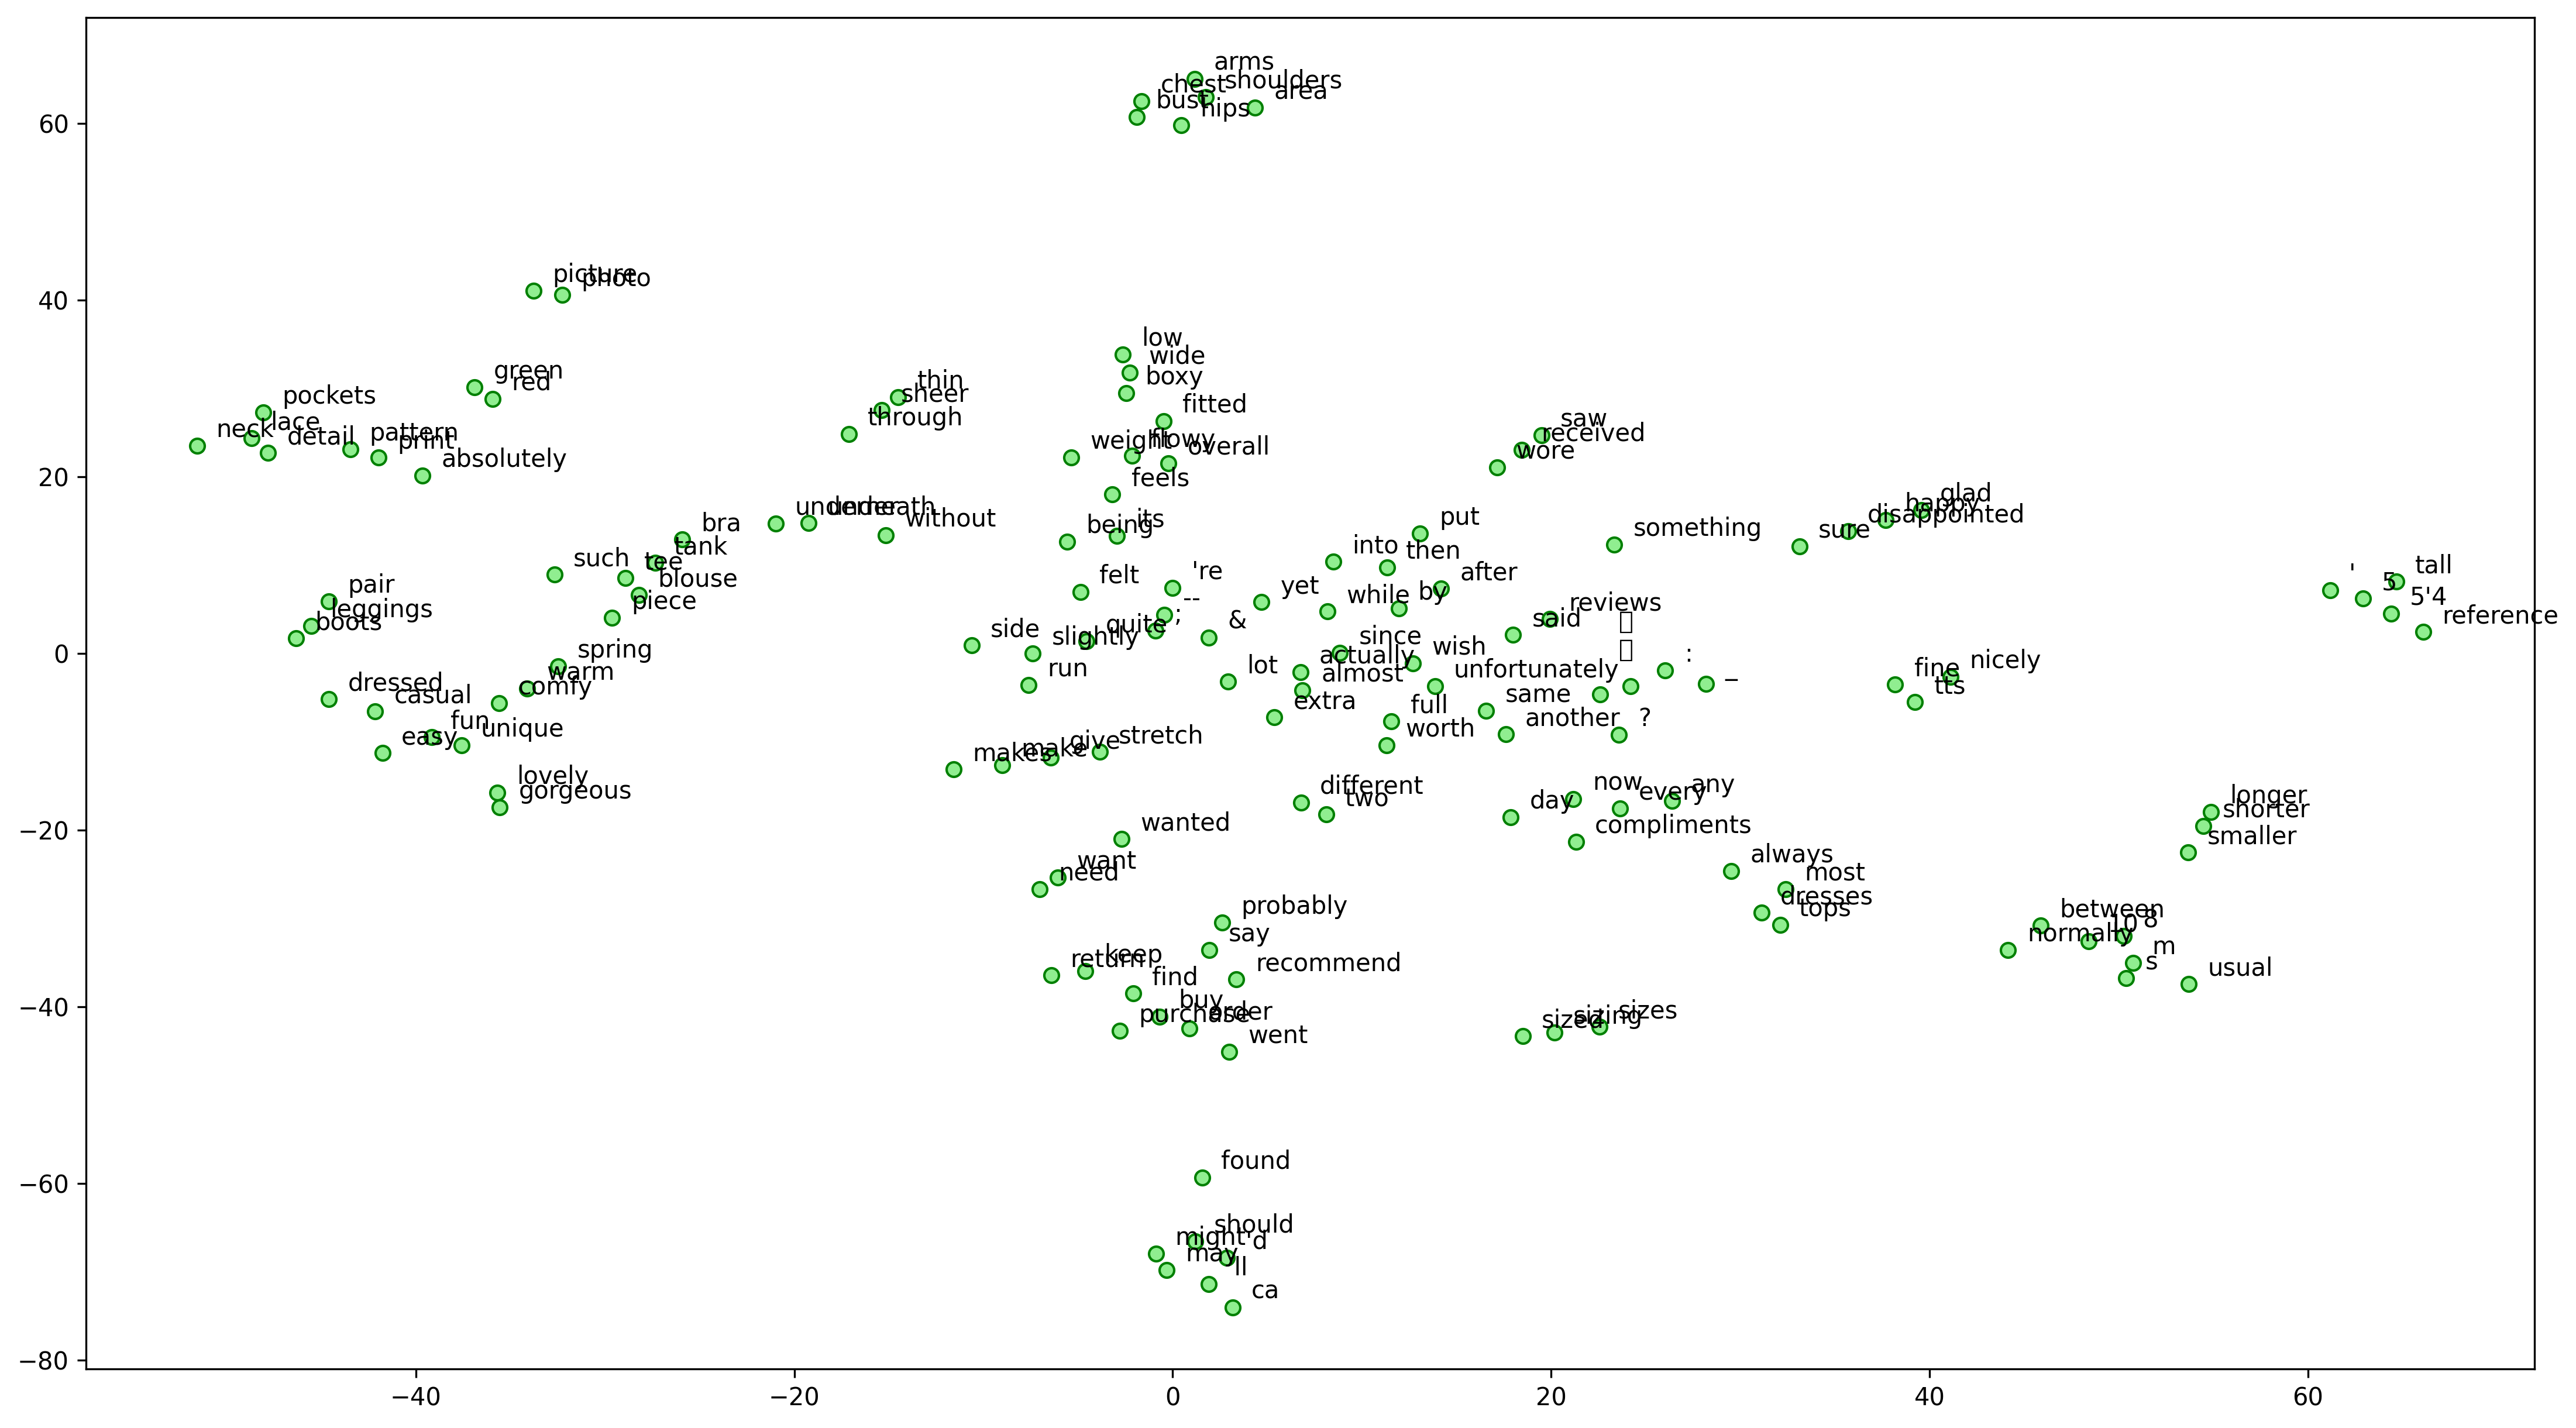

In [ ]:
from sklearn.manifold import TSNE

words = w2vmodel.wv.index2word[200:350]      ## get the word forms of voculary sample
wvs = w2vmodel.wv[words]                     ## get embeddings of word forms

tsne = TSNE(n_components=2, random_state=0, n_iter=5000, perplexity=5)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(18, 10))
plt.scatter(T[:, 0], T[:, 1], c='lightgreen', edgecolors='g')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label,
                 xy=(x + 1, y + 1),
                 xytext=(0, 0),
                 textcoords='offset points')

In [ ]:
# Select topn similar words to a given token

def display_closestwords_tsnescatterplot(model, word, size):
    
    arr = np.empty((0,size), dtype='f')
    word_labels = [word]
    close_words = model.wv.similar_by_word(word, topn=80)
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.figure(figsize=(15, 8))
    plt.scatter(x_coords, y_coords)
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

<ipython-input-22-882a1b3d3973>:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  arr = np.append(arr, np.array([model[word]]), axis=0)
<ipython-input-22-882a1b3d3973>:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  wrd_vector = model[wrd_score[0]]


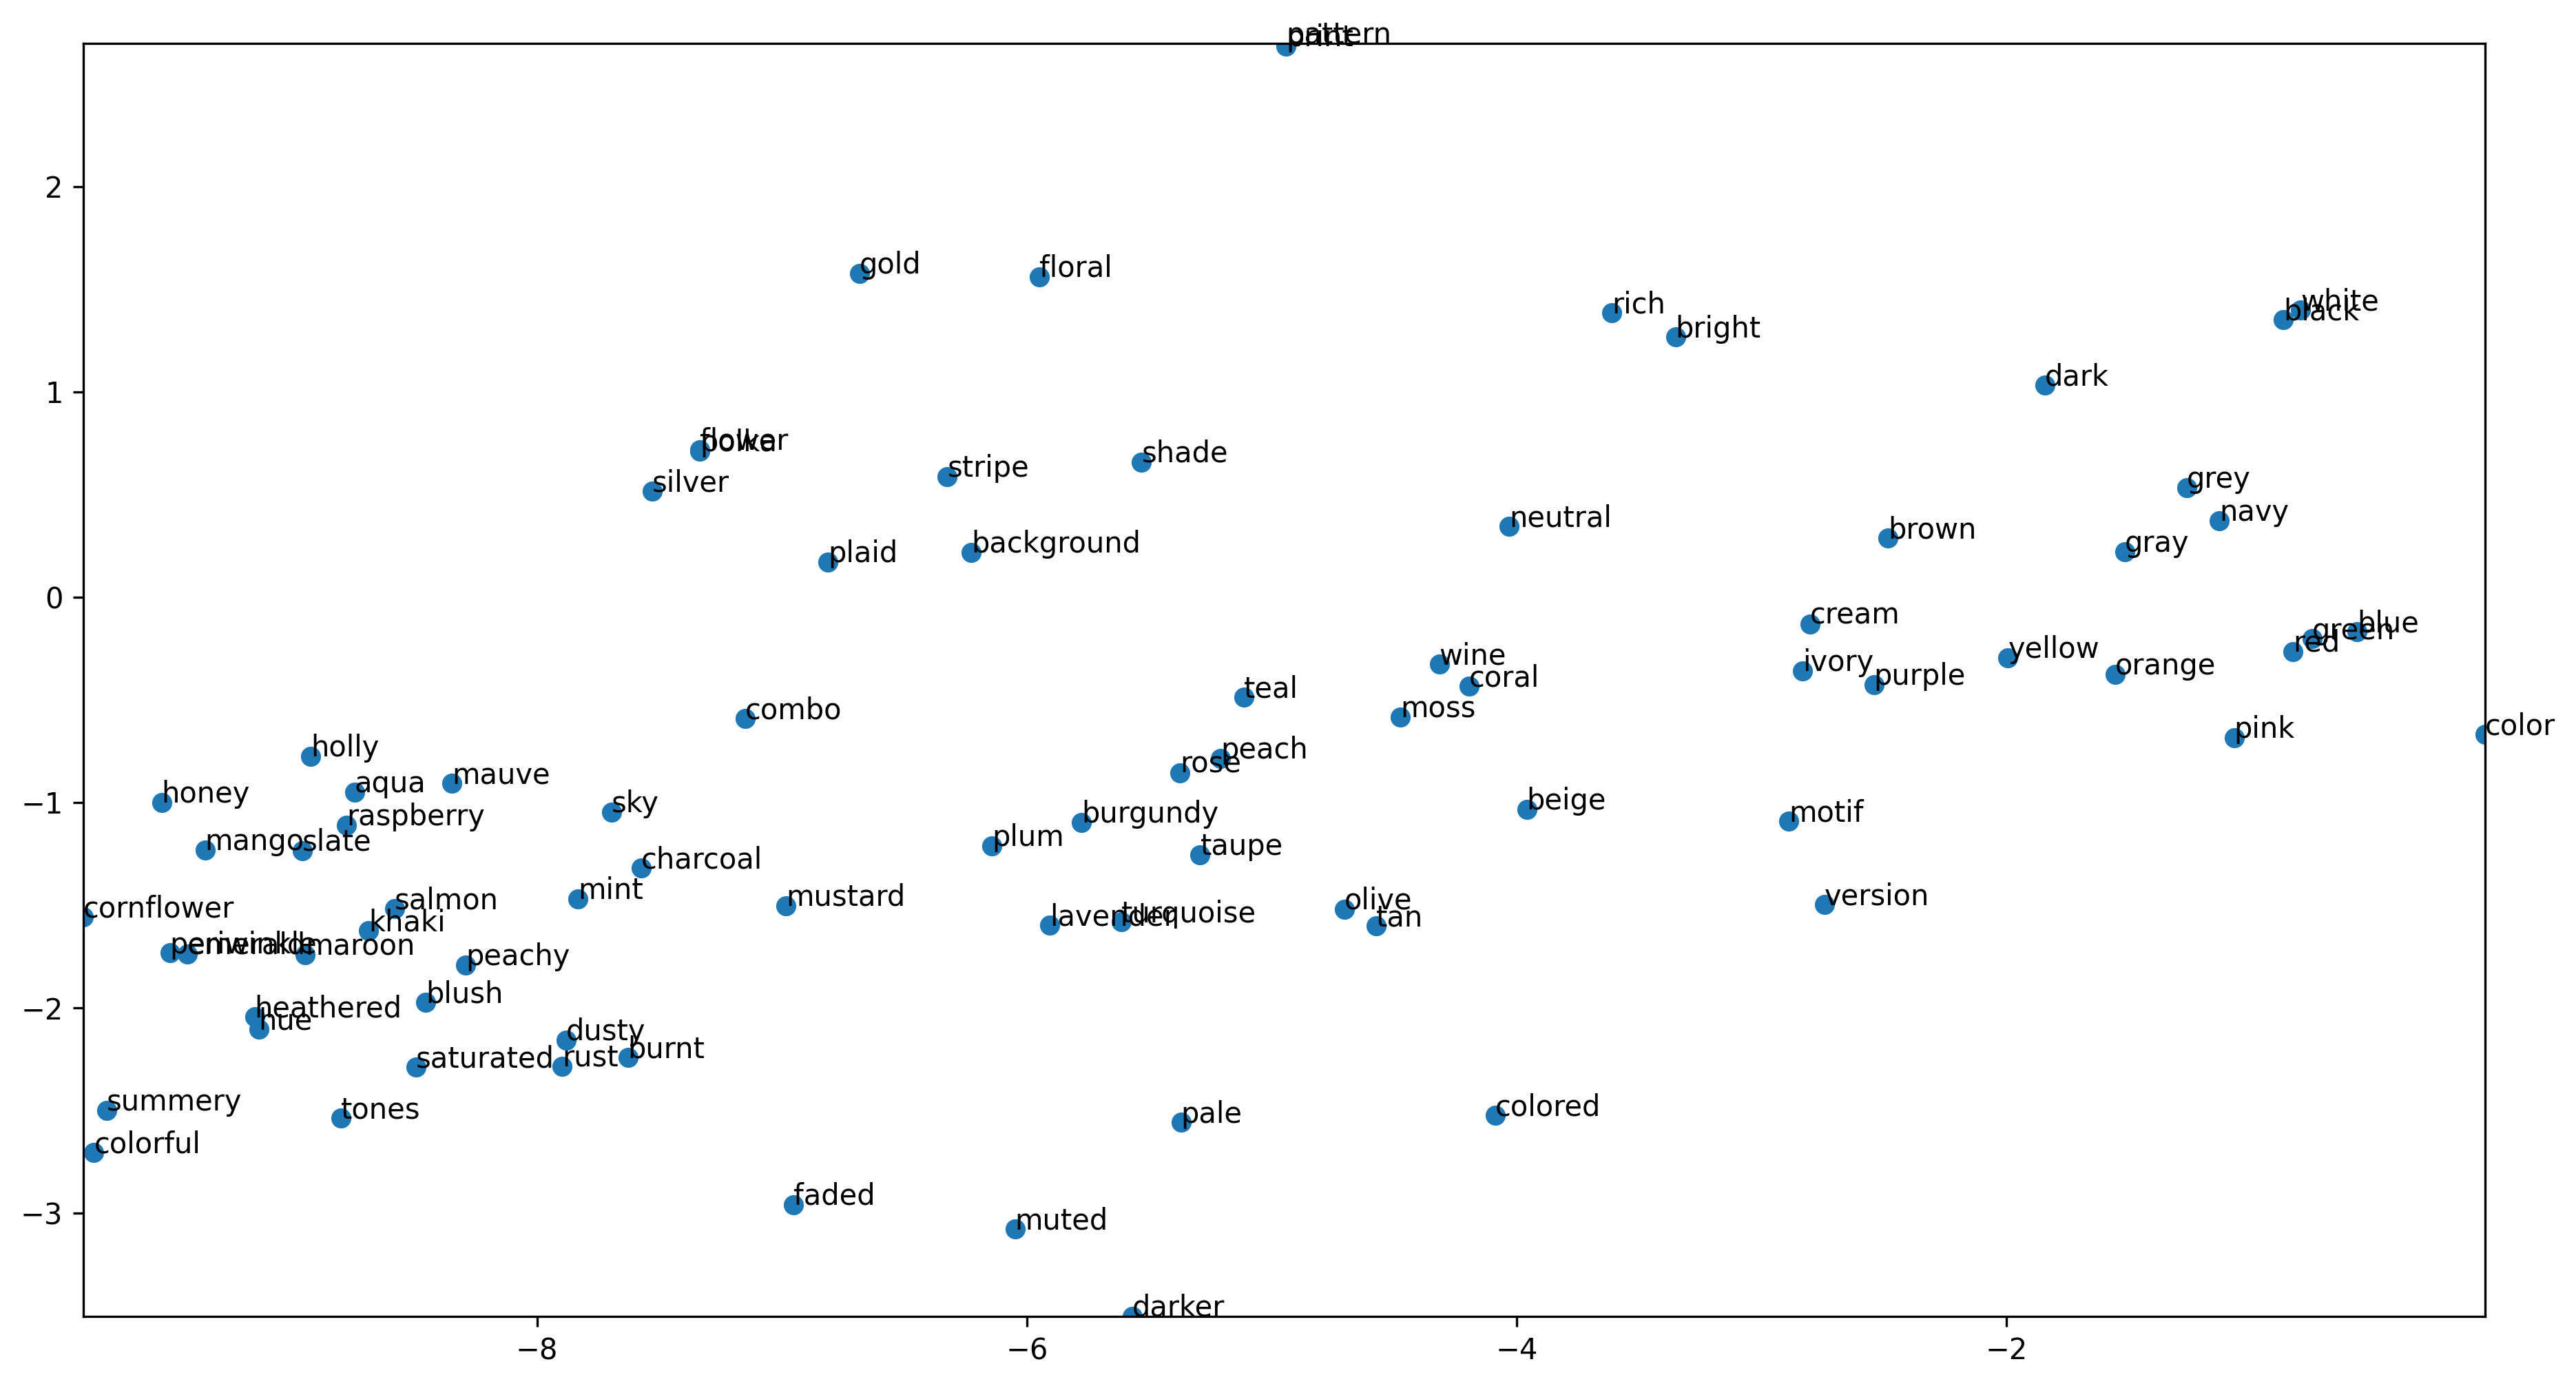

In [ ]:
# Inspect the most similar (play with topn if you like) and change the input token 'blue' to other tokens
display_closestwords_tsnescatterplot(w2vmodel, 'blue', 100) 

💬  Discuss what you can notice. 
- What type of POS types can you see? Which colours are close to eachother?
- Can you spot higher level concepts, e.g., 'color'?
- Can you find other descriptive words, e.g., words expressing touch/feeling or pattern?

# Weaknesses of Word2Vec

One weakness of the word2vec algorithm is that it has no way of dealing with words that were not in the original training data (OOV). Try, for example, the following:

In [ ]:
try:
  w2vmodel.wv.most_similar('switzerland')
except KeyError as e:
  print(e)

"word 'switzerland' not in vocabulary"


⬆ Try also 'toasty' from the wine vocabulary

# Pretrained word embeddings
Pretrained word embeddings are vector representation of words trained on a larger dataset. With pretrained embeddings, you will be using the weights and vocabulary from the end result of the training process done by someone else! 

Now check out pretrained word embeddings. This time, not Word2Vec, but GloVe.
The GloVe embeddings used below was trained on an English Wikipedia dump and English Gigaword 5th Edition dataset. Its dimensionality is 100 and has 6B tokens. The original source of the embeddings can be found here: https://nlp.stanford.edu/projects/glove/

In [ ]:
import gensim.downloader as api

# Download the pretrained Glove embeddings. Try fasttext at home.

glove_vectors = api.load("glove-wiki-gigaword-100")                            ## Glove vectors

[=================================================-] 99.7% 127.7/128.1MB downloaded


In [ ]:
glove_vectors.most_similar('wine')

[('wines', 0.8374707698822021),
 ('tasting', 0.7491590976715088),
 ('beer', 0.7244510650634766),
 ('grape', 0.7132691740989685),
 ('champagne', 0.7054867148399353),
 ('coffee', 0.700272798538208),
 ('drink', 0.6808558702468872),
 ('dessert', 0.65183424949646),
 ('drinks', 0.6488078832626343),
 ('taste', 0.6462580561637878)]

In [ ]:
glove_vectors.most_similar('switzerland')

[('austria', 0.7893784046173096),
 ('germany', 0.7793212532997131),
 ('belgium', 0.7573941946029663),
 ('swiss', 0.7425053119659424),
 ('netherlands', 0.7273494005203247),
 ('sweden', 0.7233394384384155),
 ('luxembourg', 0.7225511074066162),
 ('italy', 0.6981543898582458),
 ('denmark', 0.6770632266998291),
 ('france', 0.6720263361930847)]

⬆ Try to lowercase Switzerland

In [ ]:
## Takes a while to download, try at home
# ft_vectors = api.load('fasttext-wiki-news-subwords-300')                  ## fastText vectors -> will help you with OOV

Conceptually, Word2Vec and fastText have the same goal: to learn vector representations of words. But unlike Word2Vec, which under the hood uses words to predict words, fastText operates at a more granular level with character n-grams. Where words are represented by the sum of the character n-gram vectors.

In [ ]:
# ft_vectors.most_similar('switzerland')

⬆ Capitalize 'switzerland'

💬  Discussion time

What are the closest tokens to 'red', 'silky' and 'wine' in your own embeddings (not in the pretrained)? Write down top three tokens.
What are the advantages and disadvantages of pretrained embeddings?